<a href="https://colab.research.google.com/github/jamessutton600613-png/GC/blob/main/Untitled157.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q qiskit qiskit_aer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- [Quantum Sim #1] Starting New Run ---


Quantum Sim #1:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #1] MAX STEPS REACHED. Stalemate. ---
--- [Quantum Sim #2] Starting New Run ---


Quantum Sim #2:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #2] MAX STEPS REACHED. Stalemate. ---
--- [Quantum Sim #3] Starting New Run ---


Quantum Sim #3:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #3] MAX STEPS REACHED. Stalemate. ---
--- [Quantum Sim #4] Starting New Run ---


Quantum Sim #4:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #4] MAX STEPS REACHED. Stalemate. ---
--- [Quantum Sim #5] Starting New Run ---


Quantum Sim #5:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #5] MAX STEPS REACHED. Stalemate. ---
--- [Quantum Sim #6] Starting New Run ---


Quantum Sim #6:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #6] MAX STEPS REACHED. Stalemate. ---
--- [Quantum Sim #7] Starting New Run ---


Quantum Sim #7:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #7] MAX STEPS REACHED. Stalemate. ---
--- [Quantum Sim #8] Starting New Run ---


Quantum Sim #8:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #8] MAX STEPS REACHED. Stalemate. ---
--- [Quantum Sim #9] Starting New Run ---


Quantum Sim #9:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #9] MAX STEPS REACHED. Stalemate. ---
--- [Quantum Sim #10] Starting New Run ---


Quantum Sim #10:   0%|          | 0/5000 [00:00<?, ?it/s]

--- [Quantum Sim #10] MAX STEPS REACHED. Stalemate. ---


      FINAL SIMULATION SUMMARY REPORT
 Simulation ID   Outcome  Duration (Steps)
             1 Stalemate              4998
             2 Stalemate              4998
             3 Stalemate              4998
             4 Stalemate              4998
             5 Stalemate              4998
             6 Stalemate              4998
             7 Stalemate              4998
             8 Stalemate              4998
             9 Stalemate              4998
            10 Stalemate              4998

--------------------------------------------------
           OVERALL STATISTICS
--------------------------------------------------
Outcome
Stalemate    10
Name: count, dtype: int64


NameError: name 'np' is not defined

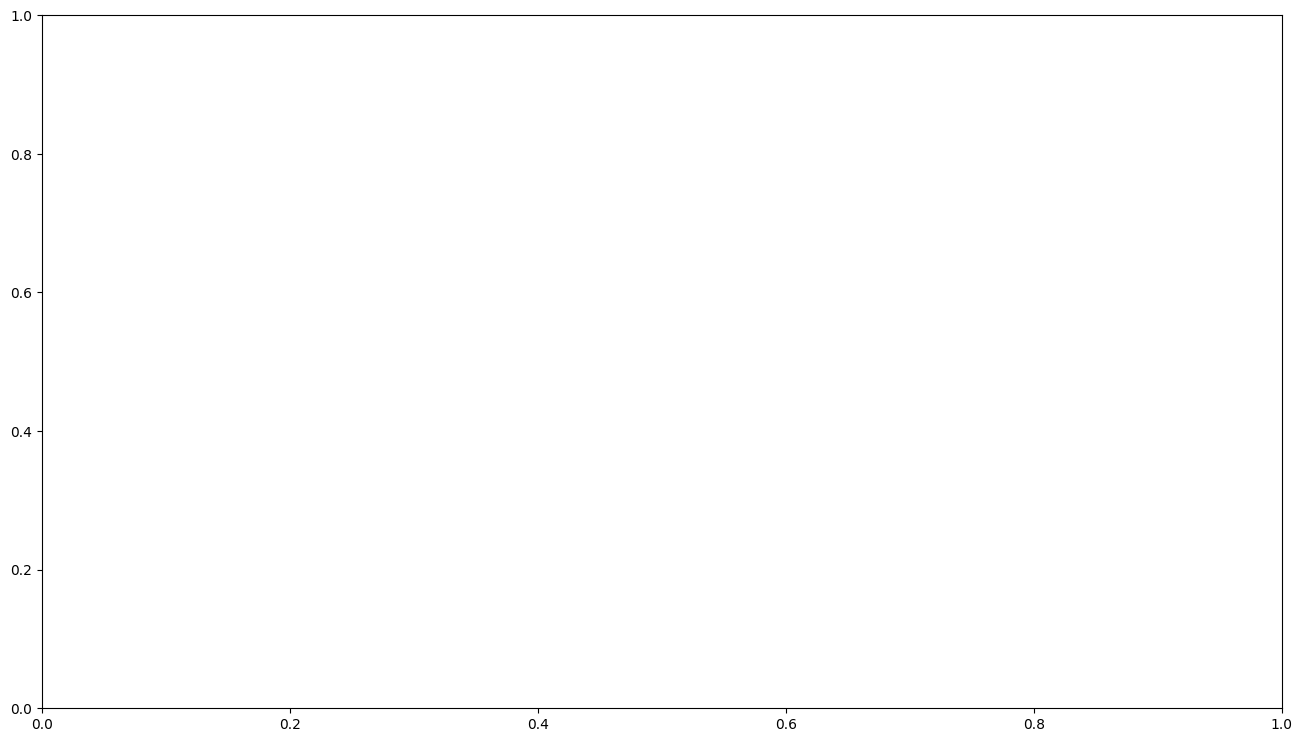

In [ ]:
import os
import pickle
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from google.colab import drive

# --- Google Drive Mount ---
# Ensures your save files are stored persistently.
drive.mount('/content/drive')

# --- Configuration ---
# Directory in your Google Drive to store save files.
SAVE_DIR = '/content/drive/My Drive/QuantumSim_Replicas'
os.makedirs(SAVE_DIR, exist_ok=True)


def run_single_quantum_simulation(sim_id, total_steps, save_path):
    """
    This function runs ONE instance of your quantum simulation.
    It includes the logic to save and resume progress.
    """
    # Check if a save file exists to resume progress
    if os.path.exists(save_path):
        print(f"--- [Quantum Sim #{sim_id}] Resuming from save file ---")
        with open(save_path, 'rb') as f:
            saved_state = pickle.load(f)
        # Restore the previous state
        start_step = saved_state['step_count']
        data_log = saved_state['log']
        # You can add any other variables from your quantum sim here
        # quantum_system_state = saved_state['quantum_state']
    else:
        print(f"--- [Quantum Sim #{sim_id}] Starting New Run ---")
        start_step = 0
        data_log = []
        # --- Initialize your quantum system here ---
        # quantum_system_state = initialize_quantum_system()

    winner = "Stalemate"

    # Create a progress bar for this simulation run
    progress_bar = trange(total_steps, desc=f"Quantum Sim #{sim_id}", initial=start_step)
    progress_bar.update(0)

    # --- Main Simulation Loop ---
    for step_count in range(start_step, total_steps):

        #
        # <<< YOUR QUANTUM SIMULATION LOGIC GOES HERE >>>
        #
        # 1. Evolve your quantum system for one step.
        #    Example: quantum_system_state = evolve(quantum_system_state)
        #
        # 2. Extract key metrics for logging.
        #    Example: population = measure_population(quantum_system_state)
        #             coherence = measure_coherence(quantum_system_state)
        #
        # 3. Check for an end condition (e.g., "extinction" or "solution found").
        #    if population == 0:
        #        winner = "Extinction"
        #        break # Exit the loop

        # This is example logging data. Modify it for your quantum metrics.
        log_entry = {
            'time': step_count,
            'population': random.randint(100, 1000) * (1 - step_count / total_steps), # Replace with your real data
            'coherence': random.random() * (1 - step_count / total_steps)      # Replace with your real data
        }
        data_log.append(log_entry)

        # --- Periodic Saving ---
        if step_count > 0 and step_count % 100 == 0: # Save every 100 steps
            progress_bar.set_postfix_str("Saving state...")
            state_to_save = {
                'step_count': step_count,
                'log': data_log,
                # Add any other variables from your quantum sim you need to save
                # 'quantum_state': quantum_system_state
            }
            temp_save_path = save_path + ".tmp"
            with open(temp_save_path, 'wb') as f:
                pickle.dump(state_to_save, f)
            os.replace(temp_save_path, save_path) # Atomic write to prevent corruption
            progress_bar.set_postfix_str("")

        progress_bar.update(1) # Advance the progress bar

    progress_bar.close()

    # --- Finalize Results ---
    final_step = (step_count - 1)
    if winner != "Stalemate":
        print(f"--- [Quantum Sim #{sim_id}] END on step {final_step}: {winner}. ---")
    else:
        print(f"--- [Quantum Sim #{sim_id}] MAX STEPS REACHED. Stalemate. ---")

    results_df = pd.DataFrame(data_log)
    summary = {
        'Simulation ID': sim_id,
        'Outcome': winner,
        'Duration (Steps)': final_step
    }
    return summary, results_df


def display_summary_report(results):
    """Calculates and prints the statistical summary for all runs."""
    if not results:
        print("No results to display.")
        return

    summary_df = pd.DataFrame(results)
    print("\n\n" + "="*50)
    print("      FINAL SIMULATION SUMMARY REPORT")
    print("="*50)
    print(summary_df.to_string(index=False))

    print("\n" + "-"*50)
    print("           OVERALL STATISTICS")
    print("-"*50)
    win_counts = summary_df['Outcome'].value_counts()
    print(win_counts)

    decisive_matches = summary_df[summary_df['Outcome'] != 'Stalemate']
    if not decisive_matches.empty:
        avg_duration = decisive_matches['Duration (Steps)'].mean()
        if pd.notna(avg_duration):
            print(f"\nAverage duration for decisive outcomes: {avg_duration:.2f} steps")
    print("="*50)


def plot_all_runs(list_of_dfs):
    """Plots a key metric from all 10 simulation runs on a single chart."""
    if not list_of_dfs:
        return

    fig, ax = plt.subplots(figsize=(16, 9))
    colors = plt.cm.viridis(np.linspace(0, 1, len(list_of_dfs)))

    for i, df in enumerate(list_of_dfs):
        if not df.empty and 'population' in df.columns:
            # This plots the 'population' metric. Change to whatever metric
            # you want to compare across all runs (e.g., 'coherence').
            ax.plot(df['time'], df['population'], label=f'Run #{i+1}', color=colors[i], linewidth=1.5)

    ax.set_title('Quantum Simulation Replicas: Population vs. Time', fontsize=16)
    ax.set_xlabel('Time (Simulation Steps)', fontsize=12)
    ax.set_ylabel('Population (or other key metric)', fontsize=12)
    ax.set_yscale('symlog') # Use a log scale if values vary widely
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend(title='Simulation Run', bbox_to_anchor=(1.01, 1), loc='upper left')
    ax.set_xlim(left=0)
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

def main():
    """Main orchestrator to run all simulations."""
    NUM_REPLICAS = 10
    MAX_STEPS_PER_RUN = 5000  # Adjust as needed for your simulation

    all_summaries = []
    all_details_dfs = []

    try:
        for i in range(1, NUM_REPLICAS + 1):
            save_file_path = os.path.join(SAVE_DIR, f'quantum_sim_state_{i}.pkl')
            summary, details_df = run_single_quantum_simulation(
                sim_id=i,
                total_steps=MAX_STEPS_PER_RUN,
                save_path=save_file_path
            )
            all_summaries.append(summary)
            all_details_dfs.append(details_df)
    except KeyboardInterrupt:
        print("\n\n--- Simulation run interrupted by user ---")

    display_summary_report(all_summaries)
    plot_all_runs(all_details_dfs)

# --- Execute the Simulation ---
if __name__ == "__main__":
    main()
